# Intro (Chris)
check RS01_Recommendation_System_User_Based_Collaborative_Filtering.ipynb from day 2 for the structure.

Project Background
- Deezer is a music streaming app offering more than 43 million tracks and is available in more than 180 countries
- Getting the music recommendation right is crucial to attractand retaincustomers
- Deezer’s music prediction engine uses collaborative filtering to provide a user with the music he/she wants to listen at the time he/she wants
- Deezer needs help to improve the accurancy of music predictionengine
- Deezer provides the data of ~8 million listening histories from c.a. 20’000 users as base for this project

Some key challenges:
✓ Deezer must accurately predict whether the user would listen to the new track recommended to them (>30 seconds without clicking Next)
✓ Deezer must consider other factors to develop an accurate and robust music recommendation system for their day-to-day business

Research questions:
- How would you develop a recommendation algorithm to win this competition
- What would you propose to solve Deezer’s general recommendation problems?
    - Publicly state how you deal with content which does not follow your policy or own political opinion. For example do you also recommend a AFD song in germany altough they are seen critical in term of extreme right wing politics.
    - Are there security mechanisme to prevent the company to store and process artificial data generated by a bot. 
    - Add more demografic data
- Do the two solutions above overlap, in what way and why or why not?

## Step 1: Import Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Download And Read In Data (Chris)

In [2]:
# Set the random seed for reproducibility
random_seed = 42

# Load the full dataset
file_path = '../data/raw_data/train.csv' 
data = pd.read_csv(file_path)


### Update requirements.txt
pip list --format=freeze > requirements.txt

In [3]:
# Get the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558834 entries, 0 to 7558833
Data columns (total 15 columns):
 #   Column           Dtype
---  ------           -----
 0   genre_id         int64
 1   ts_listen        int64
 2   media_id         int64
 3   album_id         int64
 4   context_type     int64
 5   release_date     int64
 6   platform_name    int64
 7   platform_family  int64
 8   media_duration   int64
 9   listen_type      int64
 10  user_gender      int64
 11  user_id          int64
 12  artist_id        int64
 13  user_age         int64
 14  is_listened      int64
dtypes: int64(15)
memory usage: 865.0 MB


### Data fields
**media_id**: identifiant of the song listened by the user
**album_id** - identifiant of the album of the song
**media_duration** - duration of the song
**user_gender** -  gender of the user
**user_id** -  anonymized id of the user
**context_type** - type of content where the song was listened: playlist, album ...
**release_date** - release date of the song with the format YYYYMMDD
**ts_listen** - timestamp of the listening in UNIX time
**platform_name** - type of os
**platform_family** - type of device
**user_age** - age of the user
**listen_type** - if the songs was listened in a flow or not
**artist_id** - identifiant of the artist of the song
**genre_id** - identifiant of the genre of the song
**is_listened** - 1 if the track was listened, 0 otherwise

In [4]:
data.describe()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
count,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06,7.558834e+06
mean,2.245030e+03,1.479011e+09,7.839624e+07,8.136169e+06,2.360018e+00,2.011388e+07,4.731900e-01,2.558086e-01,2.311527e+02,3.068742e-01,3.936884e-01,4.037300e+03,1.500740e+06,2.431278e+01,6.840330e-01
std,1.308979e+04,1.189935e+07,5.133633e+07,5.460090e+06,4.659856e+00,7.570138e+04,7.353008e-01,5.481663e-01,7.999463e+01,4.611968e-01,4.885672e-01,3.954754e+03,2.519546e+06,3.767797e+00,4.648999e-01
min,0.000000e+00,1.000000e+00,2.000580e+05,1.976000e+03,0.000000e+00,1.900010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00
25%,0.000000e+00,1.478460e+09,1.376614e+07,1.255566e+06,0.000000e+00,2.009123e+07,0.000000e+00,0.000000e+00,1.960000e+02,0.000000e+00,0.000000e+00,8.990000e+02,2.605000e+03,2.100000e+01,0.000000e+00
50%,3.000000e+00,1.479057e+09,9.380660e+07,9.525626e+06,1.000000e+00,2.014103e+07,0.000000e+00,0.000000e+00,2.220000e+02,0.000000e+00,0.000000e+00,2.738000e+03,1.941720e+05,2.500000e+01,1.000000e+00
75%,2.700000e+01,1.479742e+09,1.262592e+08,1.329221e+07,2.000000e+00,2.016061e+07,1.000000e+00,0.000000e+00,2.540000e+02,1.000000e+00,1.000000e+00,6.064000e+03,1.519461e+06,2.800000e+01,1.000000e+00
max,2.597310e+05,1.480636e+09,1.372601e+08,1.472086e+07,7.300000e+01,3.000010e+07,2.000000e+00,2.000000e+00,6.553500e+04,1.000000e+00,1.000000e+00,1.991700e+04,1.144741e+07,3.000000e+01,1.000000e+00


In [5]:
data.isnull().sum()

genre_id           0
ts_listen          0
media_id           0
album_id           0
context_type       0
release_date       0
platform_name      0
platform_family    0
media_duration     0
listen_type        0
user_gender        0
user_id            0
artist_id          0
user_age           0
is_listened        0
dtype: int64

All columns have non-null values, so there is no need for imputation or handling missing data.

In [6]:
# Number of genres
print('The dataset has', data['genre_id'].nunique(), 'unique genres')
# Number of unique songs in sample
print('The dataset has', data['album_id'].nunique(), 'unique albums')
# Number of unique songs in sample
print('The dataset has', data['media_id'].nunique(), 'unique songs')
# Number of unique songs in sample
print('The dataset has', data['user_gender'].nunique(), 'unique genders')
# Number of unique songs in sample
print('The dataset has', data['artist_id'].nunique(), 'unique artists')


The dataset has 2922 unique genres
The dataset has 151471 unique albums
The dataset has 452975 unique songs
The dataset has 2 unique genders
The dataset has 67142 unique artists


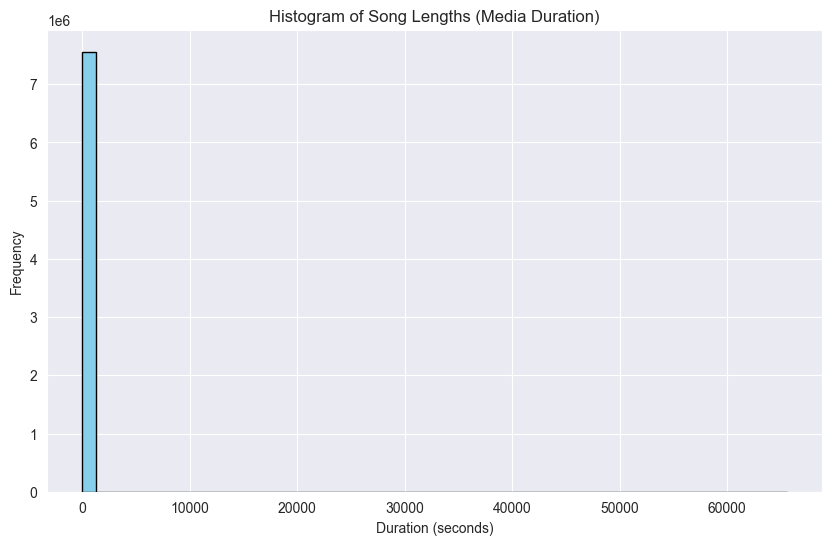

In [7]:
# Plot a histogram of the media_duration (length of songs)
plt.figure(figsize=(10, 6))
plt.hist(data['media_duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Song Lengths (Media Duration)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

In [8]:
release_year_grouped = data.groupby('media_duration').size().reset_index(name='count')
release_year_grouped_sorted = release_year_grouped.sort_values(by='media_duration', ascending=False)
release_year_grouped_sorted

,media_duration,count
1651,65535,2
1650,9158,1
1649,8216,3
1648,7575,8
1647,7054,6
...,...,...
4,4,40
3,3,41
2,2,8
1,1,30


As we can see there are just a few songs which have a long duration. As we think these songs are very niche and might annoy the customers, we exclude them out of the dataset. Max. length is 10 minutes.

In [9]:
data = data[data['media_duration'] < 600]

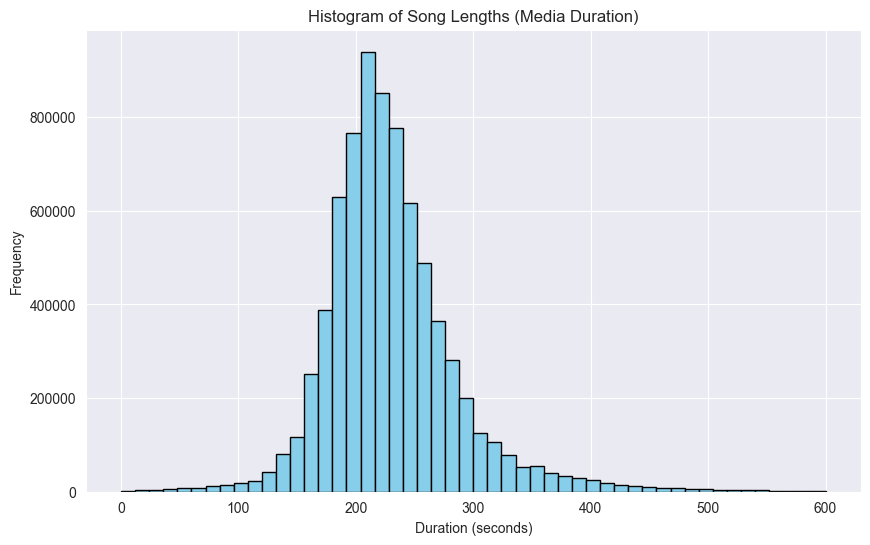

In [10]:
# Plot a histogram of the media_duration (length of songs) with a limited x-axis for better visualization
plt.figure(figsize=(10, 6))
plt.hist(data['media_duration'], bins=50, color='skyblue', edgecolor='black', range=(0, 600))
plt.title('Histogram of Song Lengths (Media Duration)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

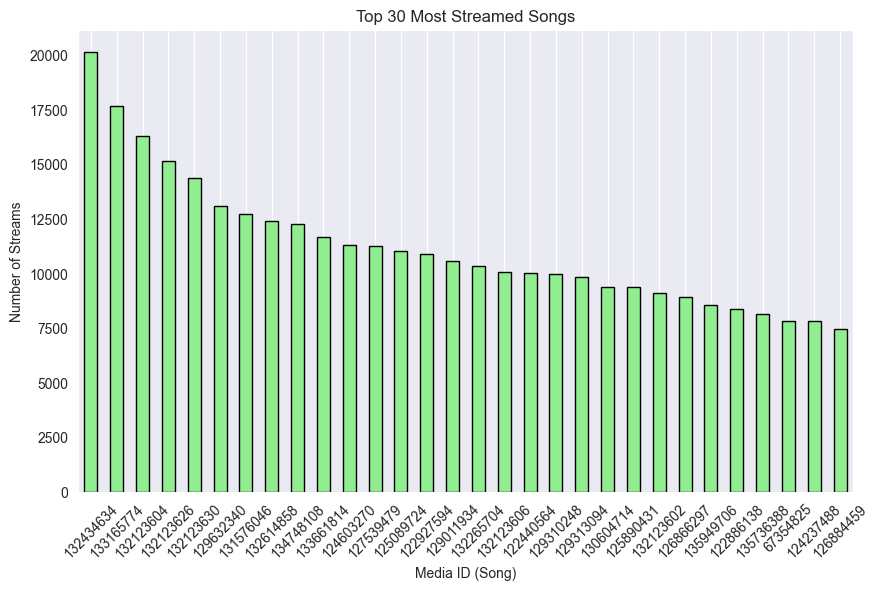

In [11]:
# Count the occurrences of each media_id (song)
song_popularity = data['media_id'].value_counts().head(30)  # Top 10 most popular songs

# Plot the popularity of the most streamed songs
plt.figure(figsize=(10, 6))
song_popularity.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 30 Most Streamed Songs')
plt.xlabel('Media ID (Song)')
plt.ylabel('Number of Streams')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

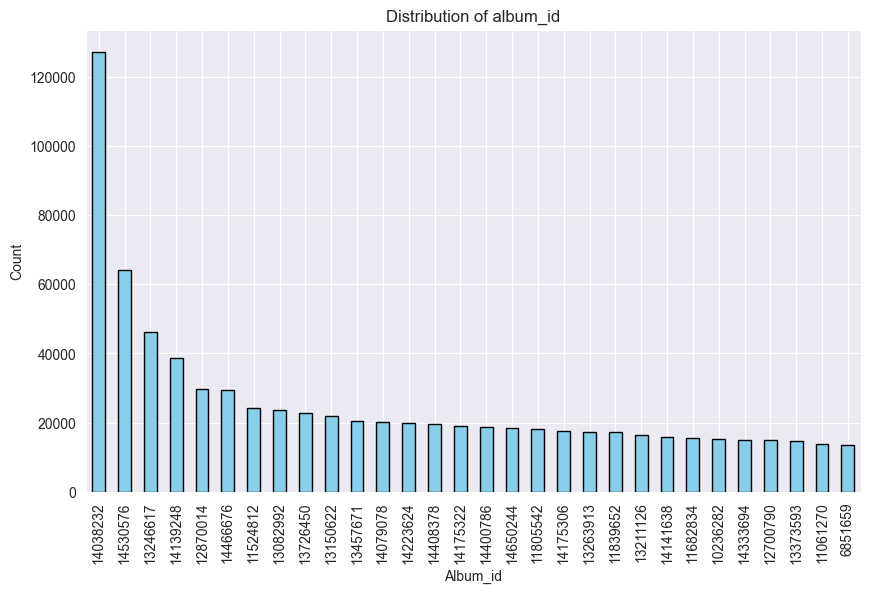

In [12]:
# Plot distribution by album_id
plt.figure(figsize=(10, 6))
data['album_id'].value_counts().head(30).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of album_id')
plt.xlabel('Album_id')
plt.ylabel('Count')
plt.grid(True)
plt.show()

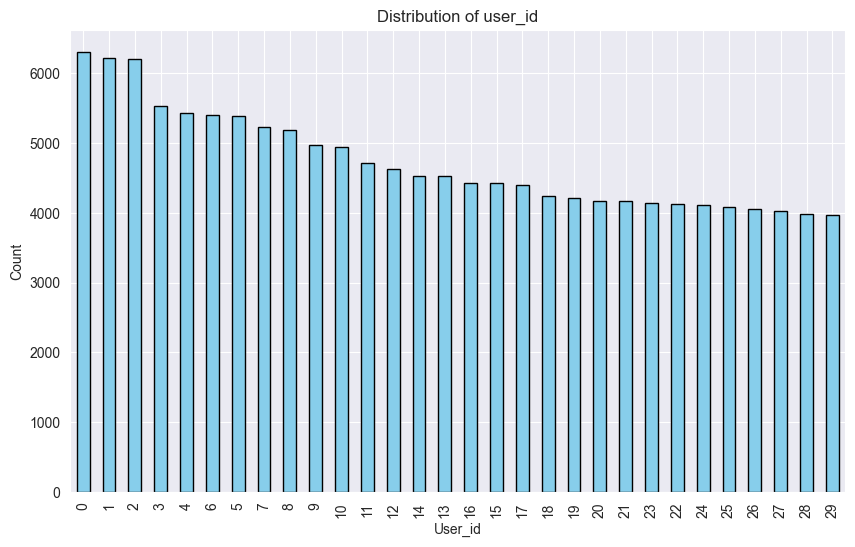

In [13]:
# Plot distribution by user_id
plt.figure(figsize=(10, 6))
data['user_id'].value_counts().head(30).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of user_id')
plt.xlabel('User_id')
plt.ylabel('Count')
plt.grid(True)
plt.show()

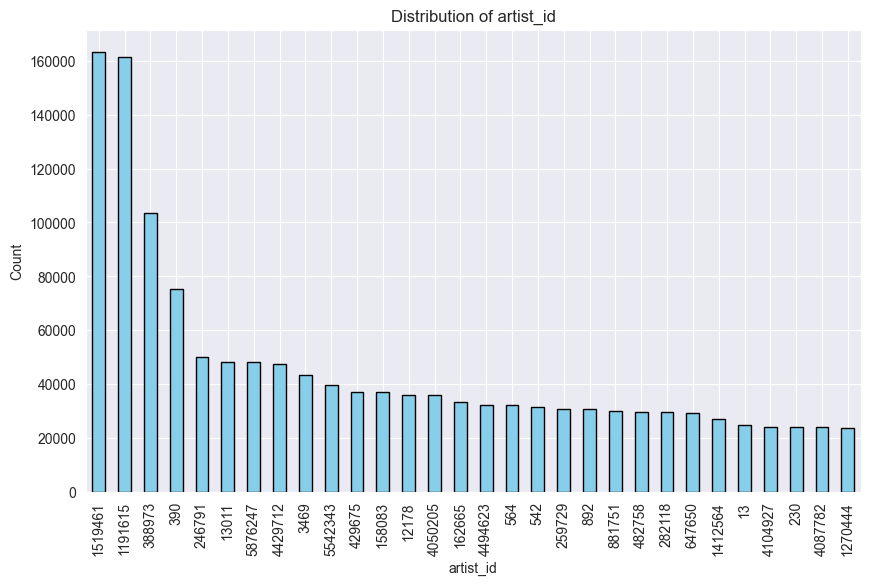

In [14]:
# Plot distribution by artist_id
plt.figure(figsize=(10, 6))
data['artist_id'].value_counts().head(30).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of artist_id')
plt.xlabel('artist_id')
plt.ylabel('Count')
plt.grid(True)
plt.show()

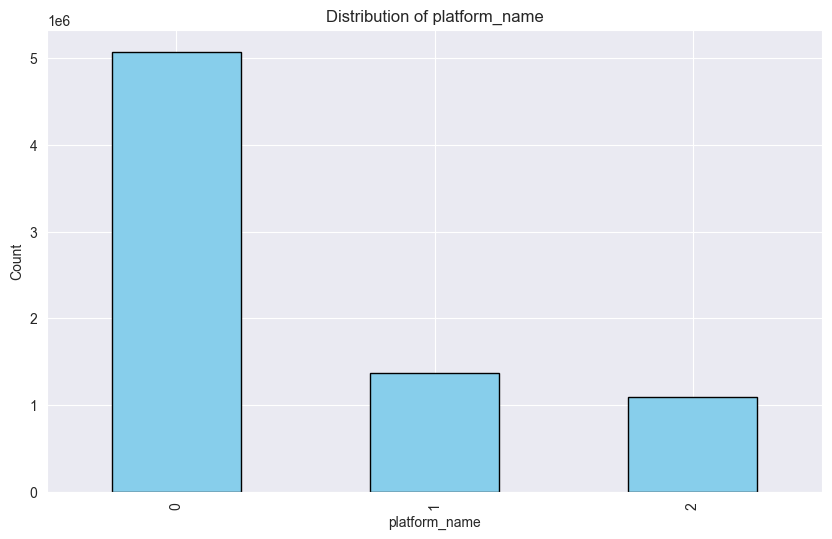

In [15]:
# Plot distribution by platform_name
plt.figure(figsize=(10, 6))
data['platform_name'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of platform_name')
plt.xlabel('platform_name')
plt.ylabel('Count')
plt.grid(True)
plt.show()

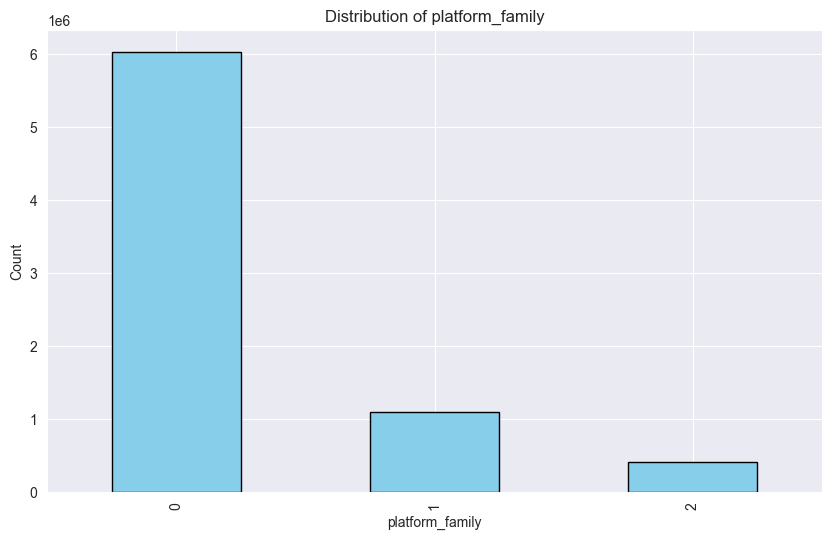

In [16]:
# Plot distribution by platform_family
plt.figure(figsize=(10, 6))
data['platform_family'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of platform_family')
plt.xlabel('platform_family')
plt.ylabel('Count')
plt.grid(True)
plt.show()

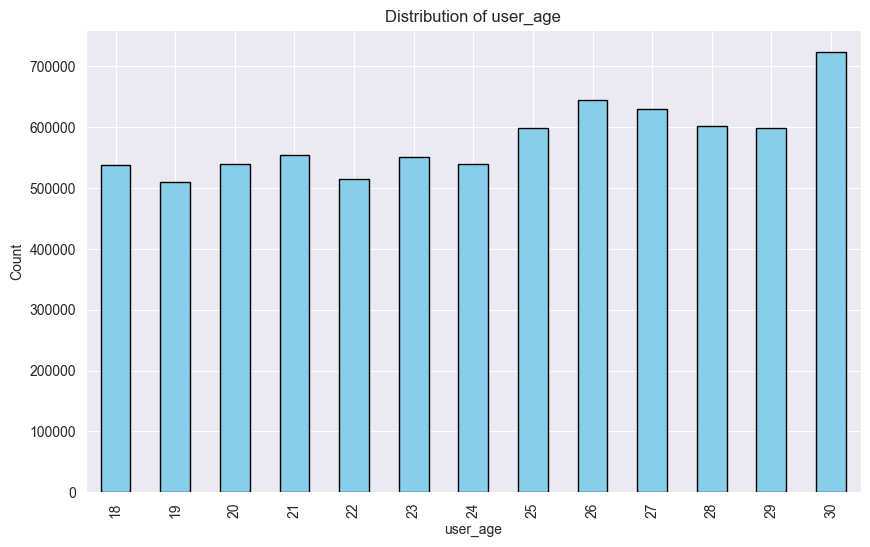

In [17]:
# Plot distribution by user_age
plt.figure(figsize=(10, 6))
data['user_age'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of user_age')
plt.xlabel('user_age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

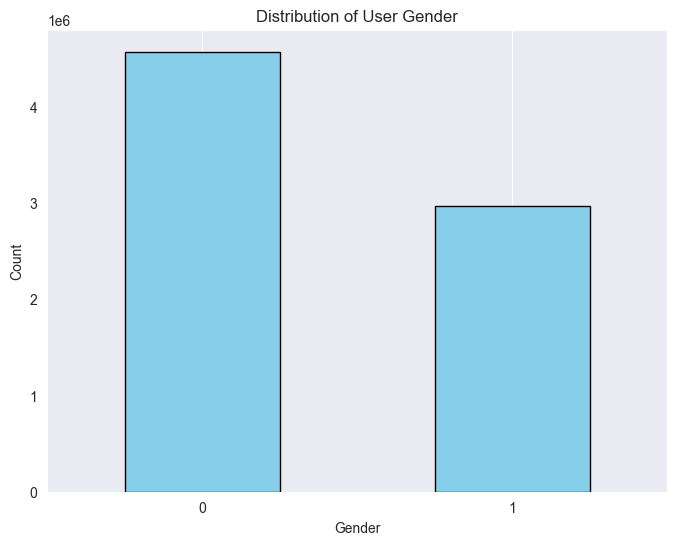

In [18]:
# Plot a bar chart for user_gender distribution
plt.figure(figsize=(8, 6))
data['user_gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

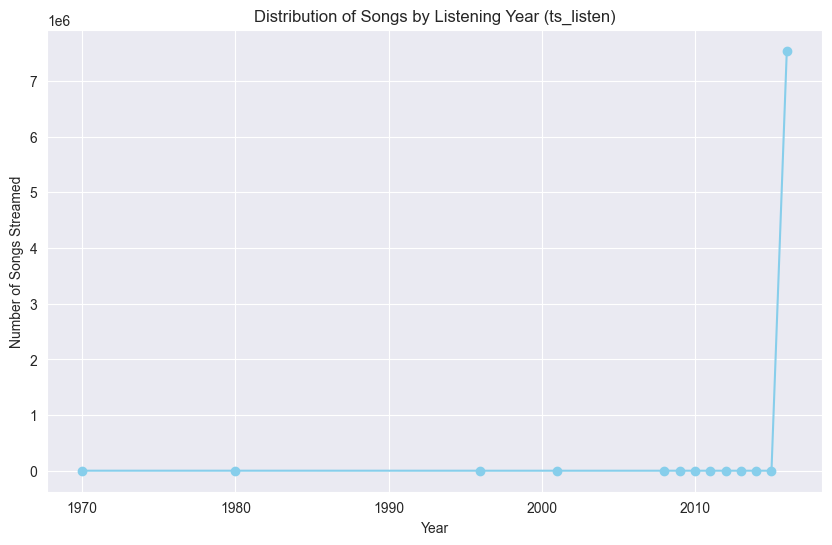

In [19]:
# Convert ts_listen to datetime and extract the year
data['ts_listen_year'] = pd.to_datetime(data['ts_listen'], unit='s').dt.year

# Plot distribution by ts_listen (listening year)
plt.figure(figsize=(10, 6))
data['ts_listen_year'].value_counts().sort_index().plot(kind='line', marker='o', color='skyblue')
plt.title('Distribution of Songs by Listening Year (ts_listen)')
plt.xlabel('Year')
plt.ylabel('Number of Songs Streamed')
plt.grid(True)
plt.show()

In [20]:
# Group by ts_listen_year and count the number of occurrences, then sort in descending order
release_year_grouped = data.groupby('ts_listen_year').size().reset_index(name='count')
release_year_grouped_sorted = release_year_grouped.sort_values(by='count', ascending=False)
release_year_grouped_sorted

,ts_listen_year,count
12,2016,7540332
1,1980,379
0,1970,246
5,2009,96
11,2015,29
4,2008,19
9,2013,19
6,2010,7
7,2011,7
10,2014,3


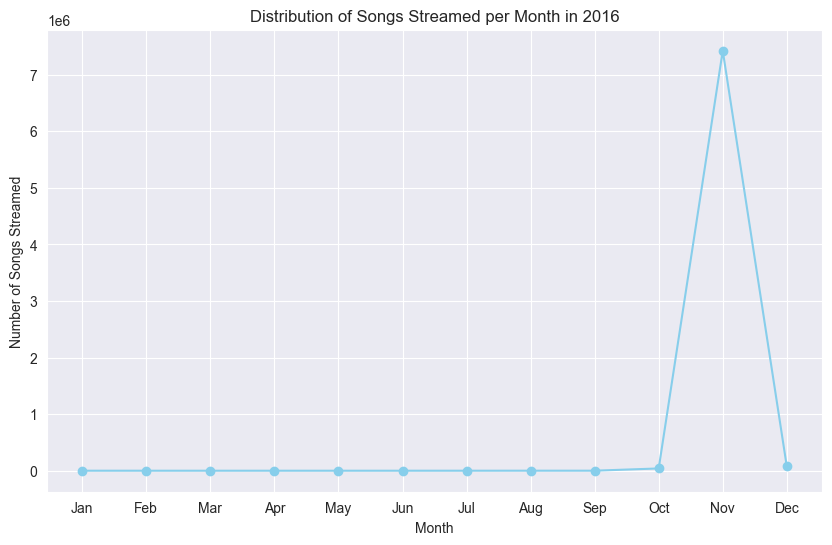

In [21]:
# As there are almost only songs played in 2016 the others seem not be part of the dataset. Therefore we exclude them. 

# Filter the data to only include records from the year 2016
data = data[data['ts_listen_year'] == 2016]

data['ts_listen_month'] = pd.to_datetime(data['ts_listen'], unit='s').dt.month

monthly_listens_2016 = data['ts_listen_month'].value_counts().sort_index()

# Plot the distribution of listens per month in 2016
plt.figure(figsize=(10, 6))
monthly_listens_2016.plot(kind='line', marker='o', color='skyblue')
plt.title('Distribution of Songs Streamed per Month in 2016')
plt.xlabel('Month')
plt.ylabel('Number of Songs Streamed')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()

We can observe, that most data is collected in November. Therefore it might be, that the music has a bias towards christmas music, which is generally not the case if there would be a bigger dataset.

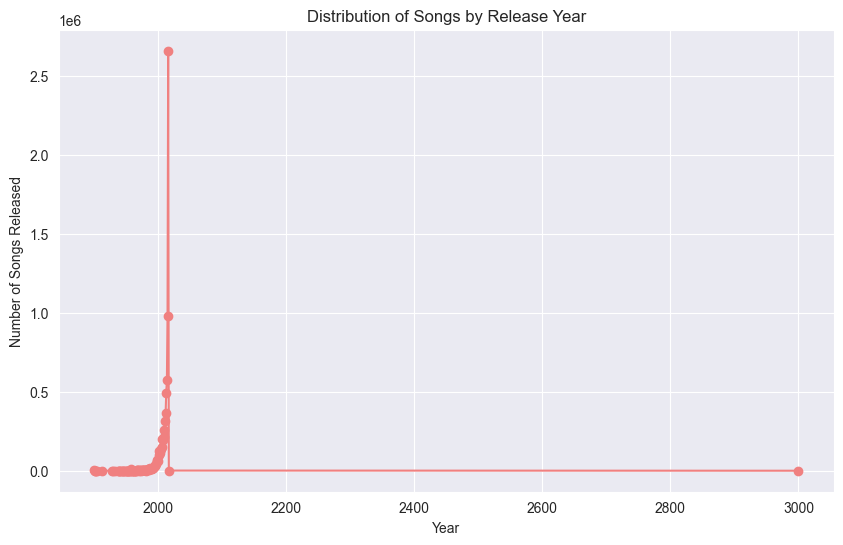

In [22]:
# Convert release_date to string and extract the year
data['release_year'] = data['release_date'].astype(str).str[:4].astype(int)

# Plot distribution by release_year
plt.figure(figsize=(10, 6))
data['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='lightcoral')
plt.title('Distribution of Songs by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.grid(True)
plt.show()

In [23]:
# # Convert ts_listen to datetime and extract the year
# data['release_year'] = pd.to_datetime(data['release_year'], unit='s').dt.year
# Plot distribution by ts_listen (listening year), filtering out years >= 2024
data = data[data['release_year'] < 2025]

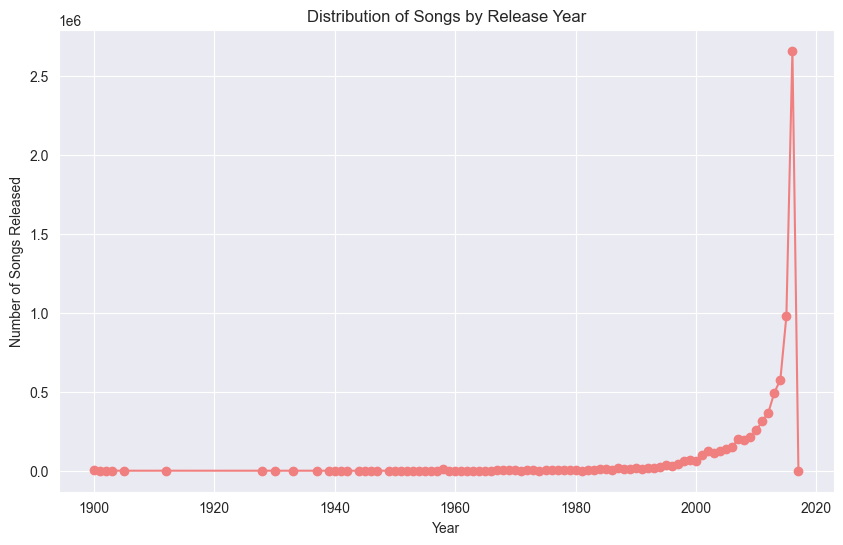

In [24]:
# Plot distribution by release_year
plt.figure(figsize=(10, 6))
data['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='lightcoral')
plt.title('Distribution of Songs by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.grid(True)
plt.show()

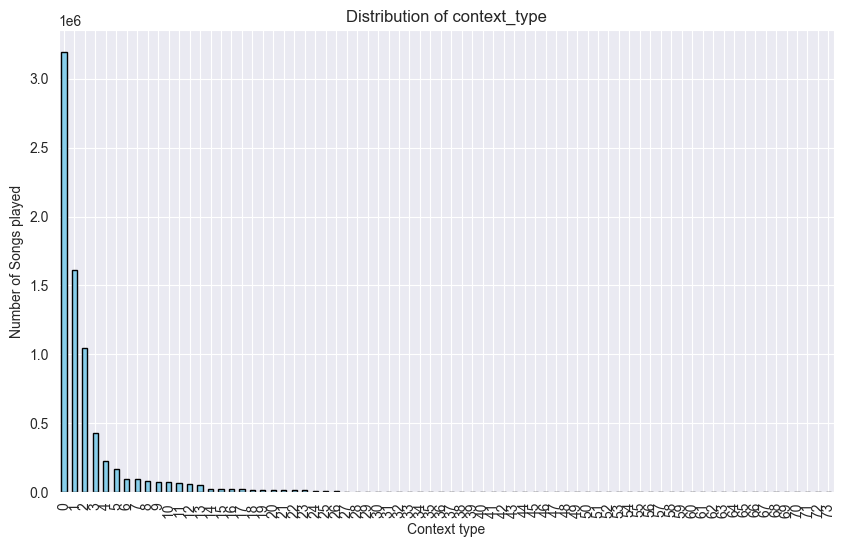

In [25]:
# Plot distribution by context_type
plt.figure(figsize=(10, 6))
data['context_type'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of context_type')
plt.xlabel('Context type')
plt.ylabel('Number of Songs played')
plt.grid(True)
plt.show()

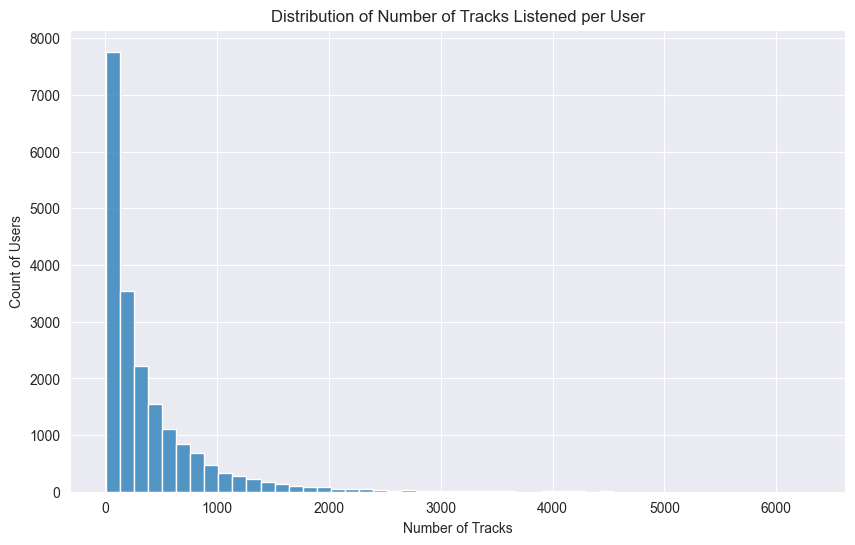

In [26]:
# Number of Tracks Listened per User
tracks_per_user = data.groupby('user_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(tracks_per_user, bins=50, kde=False)
plt.title('Distribution of Number of Tracks Listened per User')
plt.xlabel('Number of Tracks')
plt.ylabel('Count of Users')
plt.show()


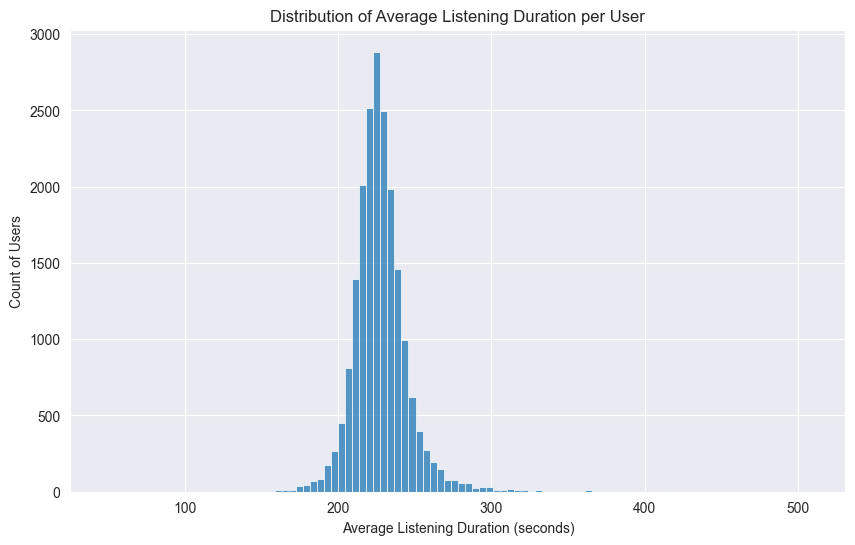

In [27]:
# Average Listening Duration per User
avg_duration_per_user = data.groupby('user_id')['media_duration'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(avg_duration_per_user, bins=100, kde=False)
plt.title('Distribution of Average Listening Duration per User')
plt.xlabel('Average Listening Duration (seconds)')
plt.ylabel('Count of Users')
plt.show()

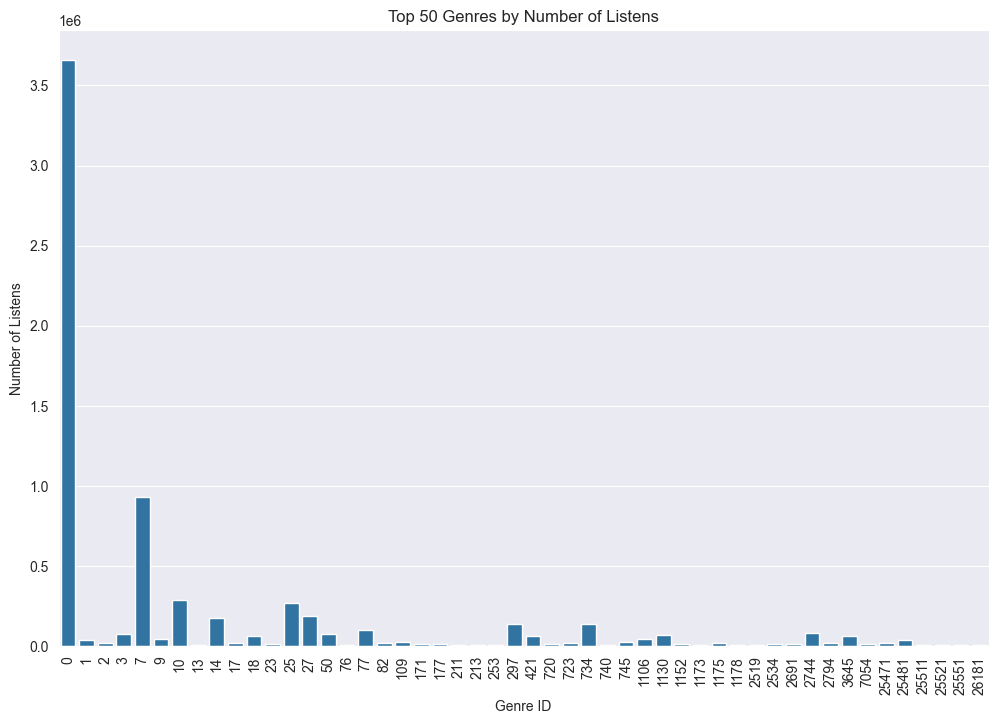

In [28]:
# Top 50 genres based on the number of listens
top_genres = data['genre_id'].value_counts().head(50).sort_values(ascending=False)

# Plot the distribution of the top 50 genres
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 50 Genres by Number of Listens')
plt.xlabel('Genre ID')
plt.ylabel('Number of Listens')
plt.xticks(rotation=90)  # Rotate the genre IDs for better visibility
plt.show()

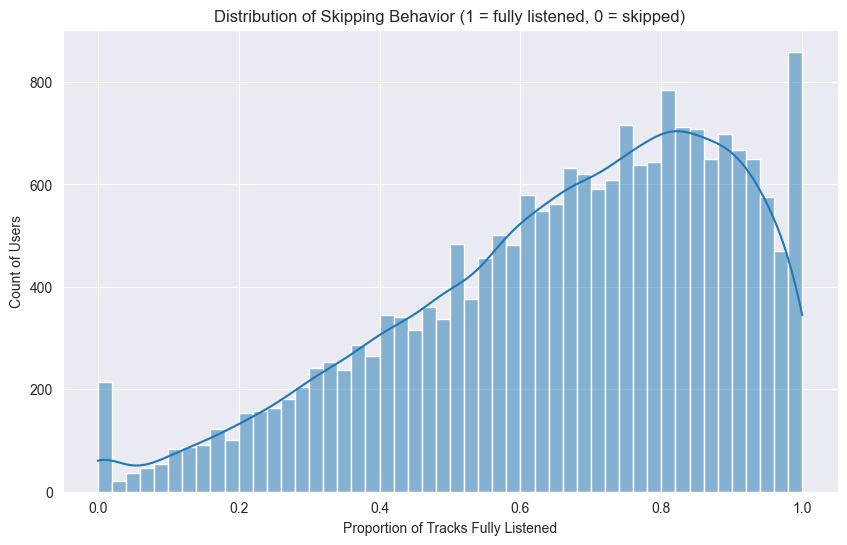

In [29]:
# Skipping Behavior
skipping_behavior = data.groupby('user_id')['is_listened'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(skipping_behavior, bins=50, kde=True)
plt.title('Distribution of Skipping Behavior (1 = fully listened, 0 = skipped)')
plt.xlabel('Proportion of Tracks Fully Listened')
plt.ylabel('Count of Users')
plt.show()

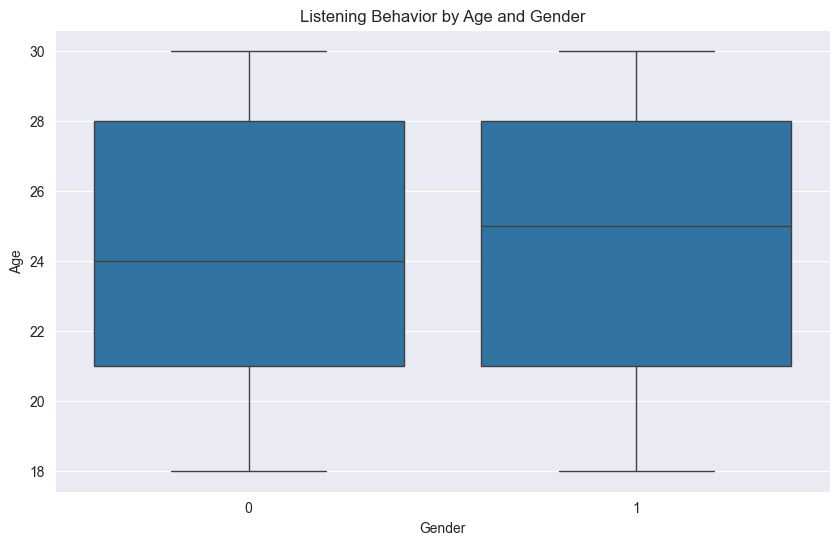

In [30]:
# Listening Behavior by Age and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_gender', y='user_age', data=data)
plt.title('Listening Behavior by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()
#test 

In [31]:
data.shape

(7540315, 18)

In [32]:
# Define the sample size (e.g., 19% of the dataset)
sample_size = 0.15  # This means 19% of the data

# Generate a random sample of the dataset
random_seed = 42
sampled_data = data.sample(frac=sample_size, random_state=random_seed)

# Save the sample to a new CSV file
sampled_file_path = '../data/sampled_data.csv'
sampled_data.to_csv(sampled_file_path, index=False)

print(f'Sampled data saved to {sampled_file_path}')

Sampled data saved to ../data/sampled_data.csv
